#### Step 1 导入相关包

In [1]:
import pandas as pd
from collections import defaultdict,Counter
from tqdm import tqdm
import pickle

import matplotlib.pyplot as plt
# 设置全局字体
plt.rcParams['font.family'] = 'Times New Roman'

import numpy as np
from scipy.interpolate import interp1d

#### Step 加载相关数据

In [2]:
with open('data/id2_affiliation_entity.pickle','rb') as file:
    id2_affiliation_entity = pickle.load(file)

In [3]:
count = 0
for paper_id in id2_affiliation_entity:
    if id2_affiliation_entity[paper_id]['Cooperation type'] == 'other':
        count +=1

In [4]:
id2_affiliation_entity['2020.acl-demos.1']

{'entity': defaultdict(dict,
             {'Method': ['Transformer',
               'TTS',
               'NMT',
               'deep neural networks',
               'machine translation',
               'GPT-2',
               'CCD IK method',
               'Normal Mapping',
               'Parallax Mapping',
               'phoneme',
               'neural networks',
               'sequence-to-sequence learning problem',
               'Technology',
               'anisotropic BRDF',
               'physical-based cloth simulation algorithm',
               'voice cloning model',
               'attentionbased sequence-to-sequence model',
               'conversation interface',
               'voice cloning technology',
               'Table2Text model',
               'cross lingual visual rendering model',
               'commentaryto-summary technique',
               'template-based method',
               'CUDA based NMT system',
               'Mubarak Alav ́ es',
         

#### Step 2 读取46w条 excel 数据

In [5]:
df_reference = pd.read_excel('data/total_reference.xlsx')
df_reference.dropna()
df_reference = df_reference.drop_duplicates()
df_reference

,Paper_ID,Title,Institution_Name,Institution_Type,Author_Name
0,W06-1673,A maximum-entropy-inspired parser,['Brown University'],['education'],Eugene Charniak
1,W06-1673,Probabilistic Networks and Expert Systems,[],[],"Robert G Cowell,A Philip Dawid,Steffen L Lauri..."
2,W06-1673,The problem of computing the most probable tre...,"['Stanford University', 'Stanford University',...","['education', 'education', 'education']",Rens Bod
3,W06-1673,Introduction to the CoNLL-2004 shared task: Se...,['University of Colorado System'],['education'],"Xavier Carreras,Lluís Màrquez"
4,W06-1673,Introduction to the CoNLL-2005 shared task: Se...,"['Korea University', 'Korea University', 'Kore...","['education', 'education', 'education']","Xavier Carreras,Lluís Màrquez"
...,...,...,...,...,...
479919,W12-3205,FaceNet: A unified embedding for face recognit...,"['Google (United States)', 'Google (United Sta...","['company', 'company', 'company']",NaN
479920,W12-3205,Efficient Estimation of Word Representations i...,"['Meta (Israel)', 'Chongqing Jiaotong Universi...","['company', 'education', 'company', 'company']",NaN
479921,W12-3205,Noise-contrastive estimation: A new estimation...,"['University of Helsinki', 'Helsinki Institute...","['education', 'facility']",NaN
479922,W12-3205,Learning a Nonlinear Embedding by Preserving C...,"['University of Toronto', 'University College ...","['education', 'education']",NaN


#### Step 3 提取数据

In [6]:
map_dict = {
    'education':'academic',
    'facility':'academic',
    'government':'academic',
    'nonprofit':'academic',
    'company':'industry',
    'healthcare':'industry',
}

In [7]:
def check_categories(institution_type_lists):
    if 'academic' in institution_type_lists and 'industry' in institution_type_lists:
        return 'cooperation'
    else:
        return institution_type_lists[0] 

def process_affiliation(institution_type_lists,mode ='first'):
    if mode == 'first':
        return institution_type_lists[0]
    
    elif mode == 'all':
        return check_categories(institution_type_lists)
    
    elif mode == 'first and last':
        return institution_type_lists[0],institution_type_lists[-1]

In [8]:
paper_reference_dict = defaultdict(list)

# 定义一个获取默认值的函数
def get_mapped_value(item):
    return map_dict.get(item, 'other')  # 如果 item 不在 map_dict 中，返回 None

for row in tqdm(df_reference.iterrows(),total=len(df_reference)):
    paper_id = row[1][0]
    title = row[1][1]
    try:
        institution_type_lists = eval(row[1][3])
    except Exception as e:
        print(row[0],row[1][3])
        continue
    if institution_type_lists == []:
        continue
    mapped_institution_type_lists = list(map(get_mapped_value,institution_type_lists))
    insti_type = process_affiliation(mapped_institution_type_lists,mode='all')
    paper_reference_dict[paper_id].append(insti_type)
    
print('数据解析正确')

 91%|█████████▏| 438479/479924 [00:16<00:01, 30114.52it/s]

432478 nan
435546 nan
437432 nan
437620 nan
438582 nan
439495 nan


 93%|█████████▎| 444603/479924 [00:16<00:01, 29900.69it/s]

439900 nan
440735 nan
443143 nan
443307 nan
444285 nan
444528 nan
445012 nan
445083 nan
445431 nan
445486 nan
445673 nan
445870 nan
446013 nan
446072 nan
446580 nan
447408 nan
447576 nan
447593 nan


 94%|█████████▍| 453425/479924 [00:16<00:00, 28365.11it/s]

447610 nan
447649 nan
447767 nan
447793 nan
447879 nan
448175 nan
448461 nan
448785 nan
449847 nan
451409 nan
452020 nan
452208 nan
452249 nan
452368 nan
452482 nan
452646 nan
452988 nan
453005 nan
453349 nan
453364 nan


 96%|█████████▌| 459309/479924 [00:16<00:00, 28852.36it/s]

453502 nan
453587 nan
453719 nan


100%|██████████| 479924/479924 [00:17<00:00, 27338.69it/s]

数据解析正确


In [9]:
cite_year_dict = defaultdict(dict)
for year in range(2000,2023):
    cite_year_dict[year] = defaultdict(list)
for paper_id in tqdm(paper_reference_dict):
    information_dict = id2_affiliation_entity[paper_id]
    try:
        publish_year = int(information_dict['year'])
        institution_type = information_dict['Cooperation type']
    except Exception as e:
        pass

    cite_year_dict[publish_year][institution_type].append(paper_reference_dict[paper_id])

100%|██████████| 17788/17788 [00:00<00:00, 1190855.37it/s]


In [10]:
count_dict = defaultdict(dict)
for year in range(2000,2023):
    count_dict[year] = defaultdict(dict)
    for institution_type in ['academic','industry','cooperation']:
        count_dict[year][institution_type] = dict()
        for sub_lists in cite_year_dict[year][institution_type]:
            for item in sub_lists:
                
                count_dict[year][institution_type][item] = count_dict[year][institution_type].get(item,0) + 1

In [11]:
count_dict

defaultdict(dict,
            {2000: defaultdict(dict,
                         {'academic': {'academic': 1372,
                           'industry': 171,
                           'cooperation': 289,
                           'other': 36},
                          'industry': {'cooperation': 58,
                           'academic': 246,
                           'other': 7,
                           'industry': 39},
                          'cooperation': {'academic': 98,
                           'industry': 11,
                           'cooperation': 10,
                           'other': 1}}),
             2001: defaultdict(dict,
                         {'academic': {'academic': 1144,
                           'industry': 148,
                           'cooperation': 273,
                           'other': 22},
                          'industry': {'academic': 124,
                           'other': 2,
                           'industry': 29,
                  

In [12]:
count_dict[2000]

defaultdict(dict,
            {'academic': {'academic': 1372,
              'industry': 171,
              'cooperation': 289,
              'other': 36},
             'industry': {'cooperation': 58,
              'academic': 246,
              'other': 7,
              'industry': 39},
             'cooperation': {'academic': 98,
              'industry': 11,
              'cooperation': 10,
              'other': 1}})

In [13]:
# 每一年构造一个流动关系
interval_year = 1
flow_lists = defaultdict(dict)
for i in range(2000, 2023, interval_year):
    temp_dict = defaultdict(dict)

    for j in range(i, i+interval_year):
        if j == 2023:
            break
        
        for institution_type in ['academic','industry','cooperation']:
            temp_dict[institution_type] = {each: temp_dict[institution_type].get(each, 0) + count_dict[j][institution_type].get(each, 0) for each in (*temp_dict[institution_type], *count_dict[j][institution_type])}
    flow_lists[i] = temp_dict

#### Step 3 算工业界引用占比的变化

In [14]:
flow_lists

defaultdict(dict,
            {2000: defaultdict(dict,
                         {'academic': {'academic': 1372,
                           'industry': 171,
                           'cooperation': 289,
                           'other': 36},
                          'industry': {'cooperation': 58,
                           'academic': 246,
                           'other': 7,
                           'industry': 39},
                          'cooperation': {'academic': 98,
                           'industry': 11,
                           'cooperation': 10,
                           'other': 1}}),
             2001: defaultdict(dict,
                         {'academic': {'academic': 1144,
                           'industry': 148,
                           'cooperation': 273,
                           'other': 22},
                          'industry': {'academic': 124,
                           'other': 2,
                           'industry': 29,
                  

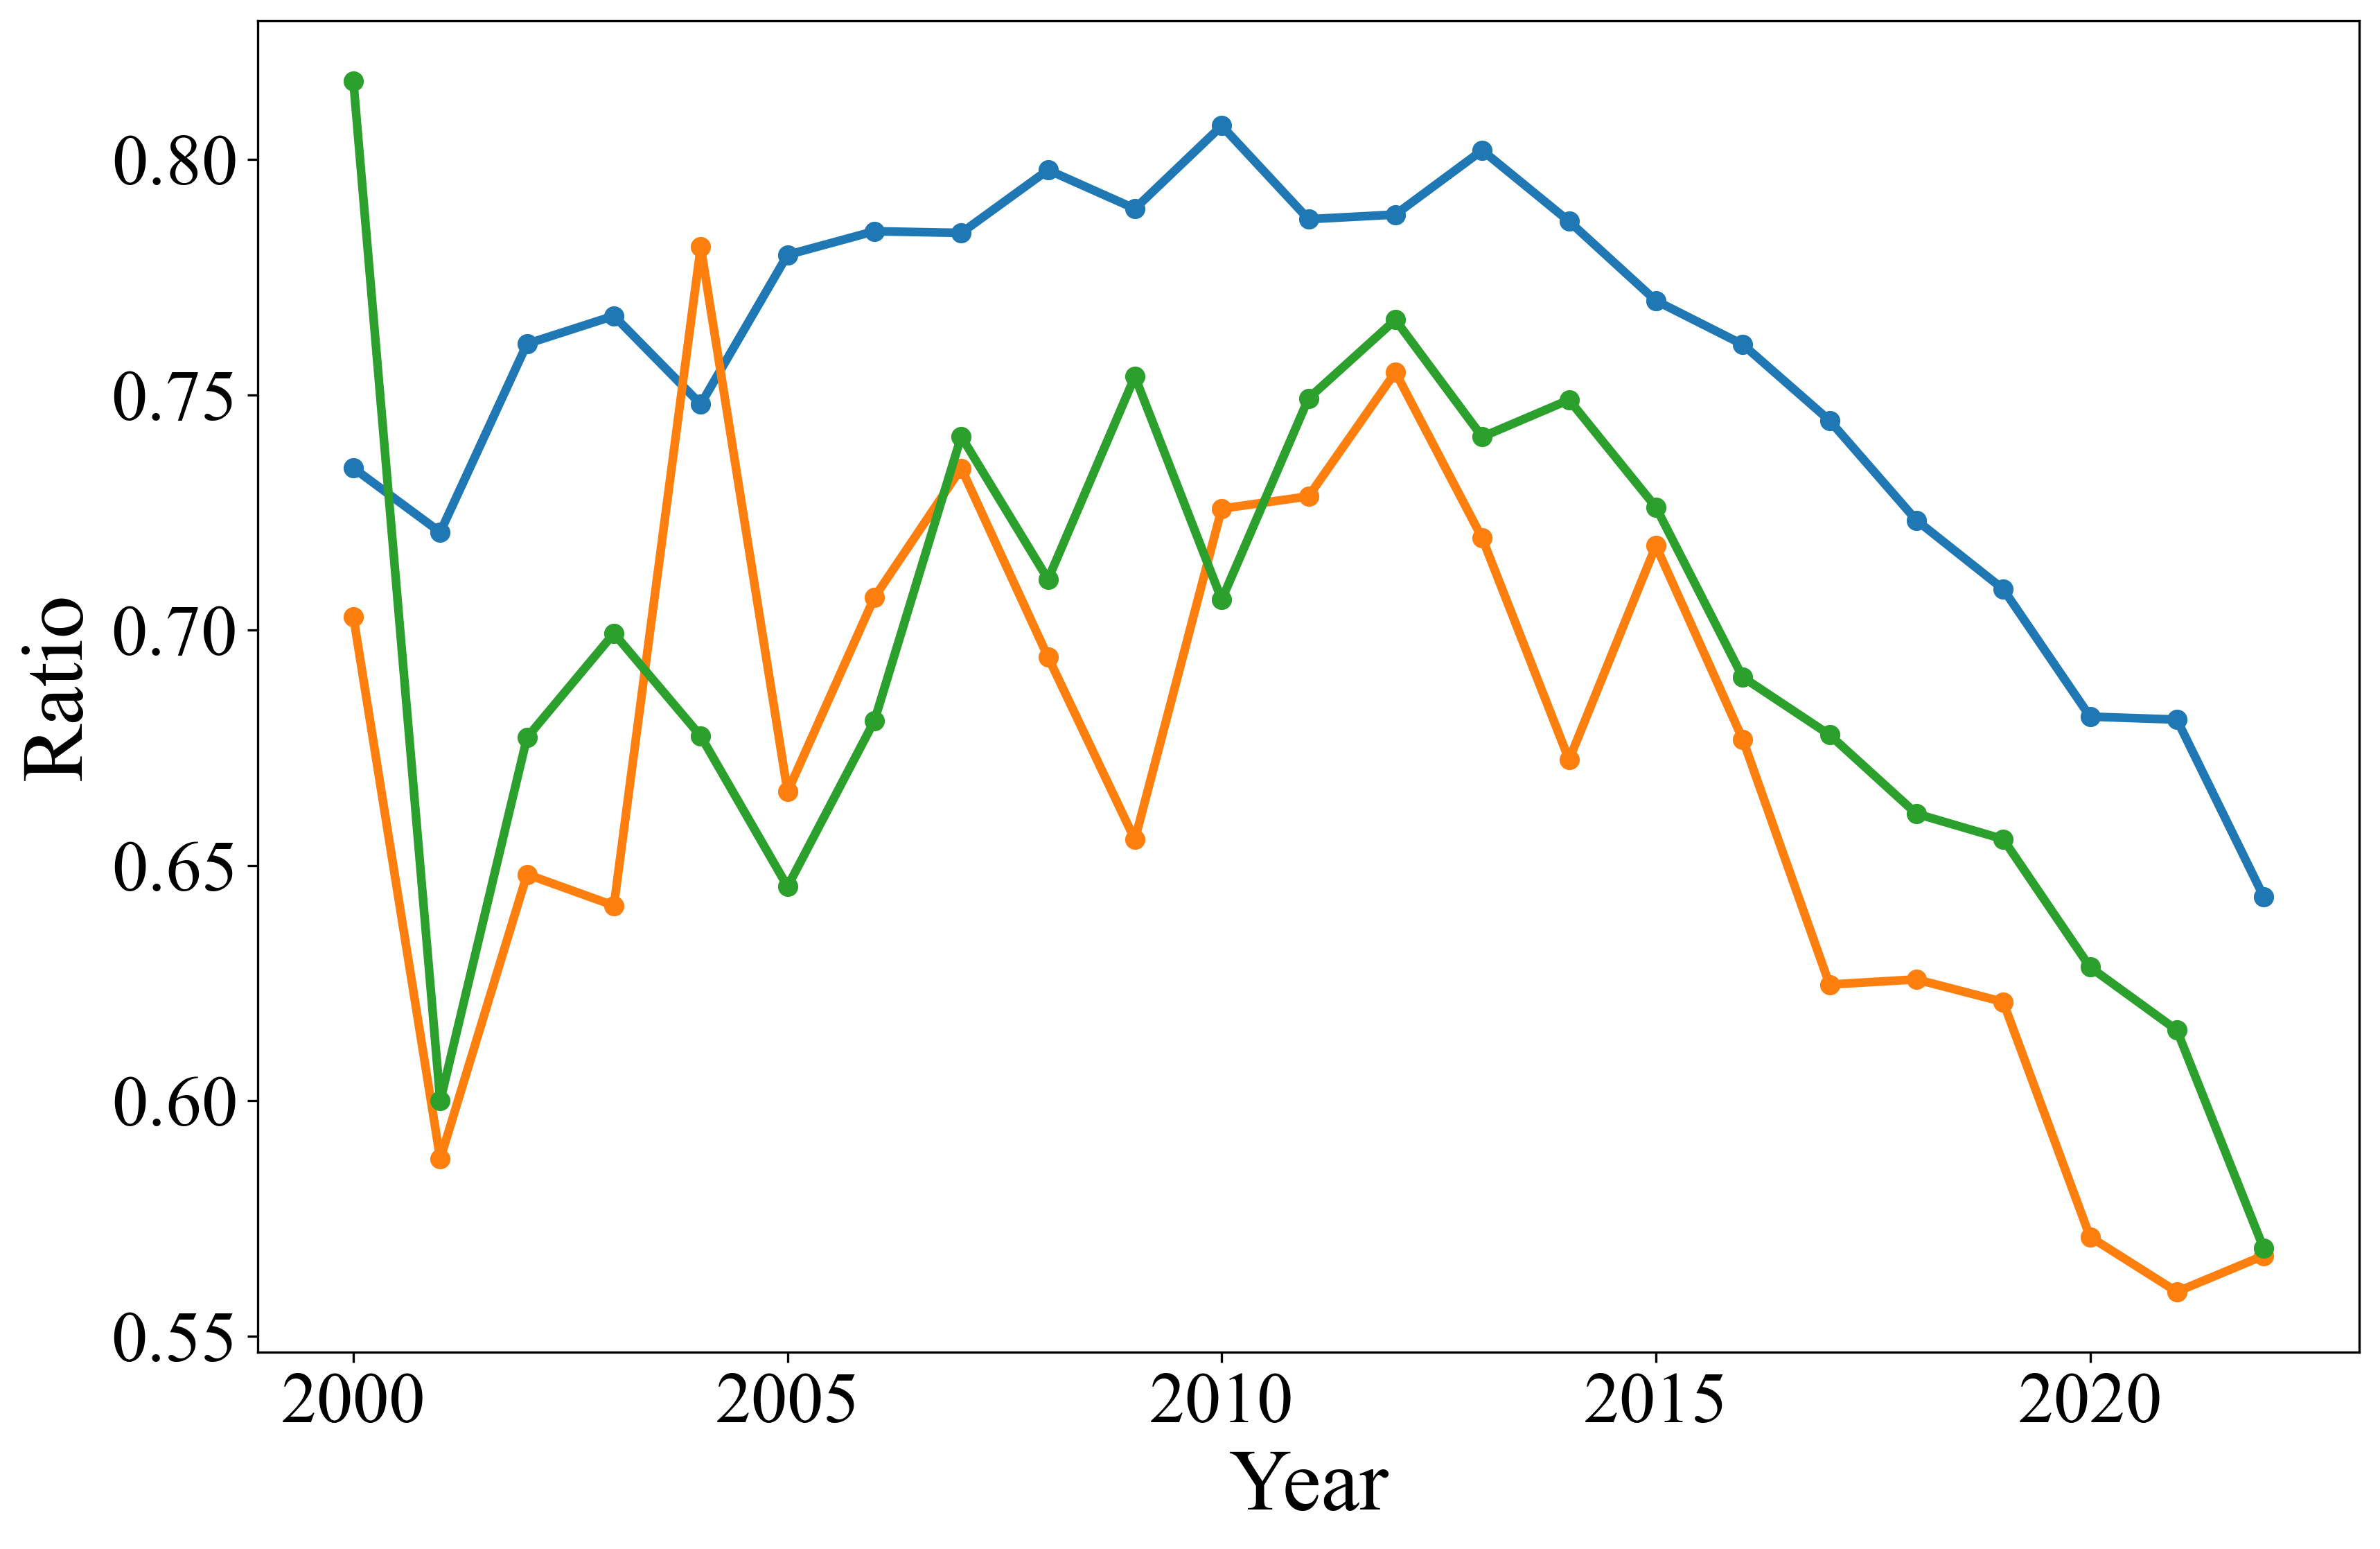

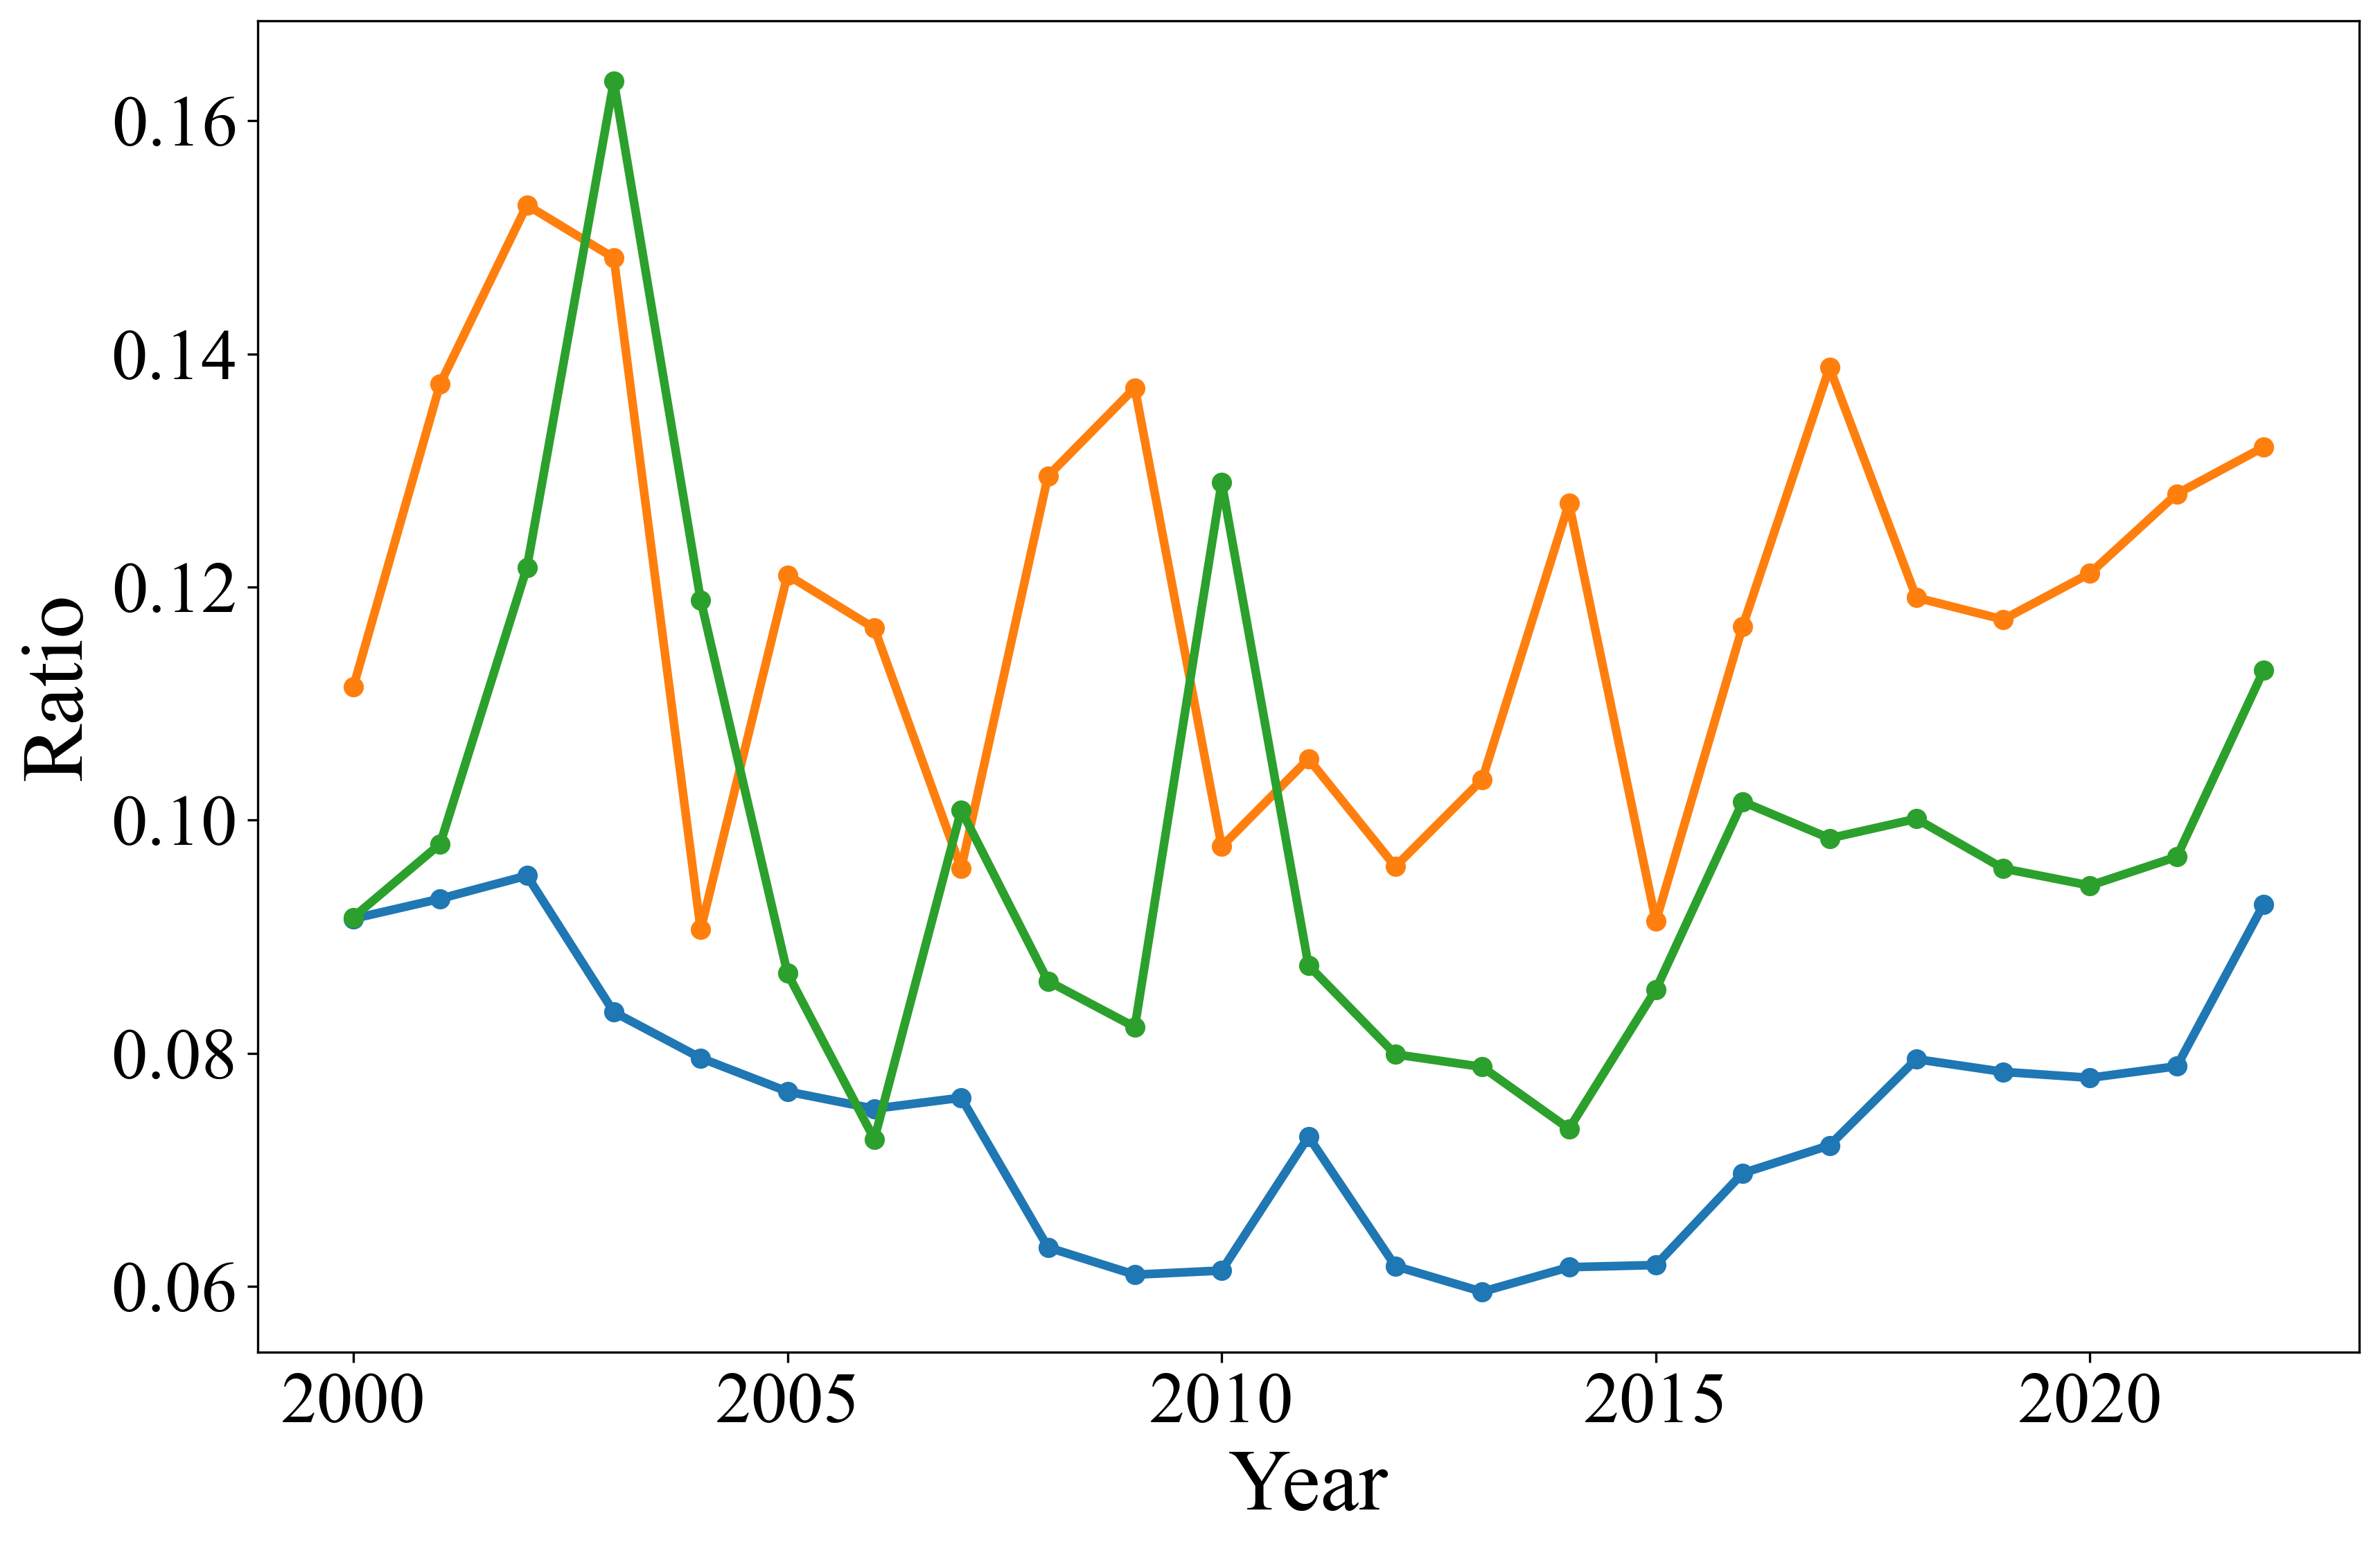

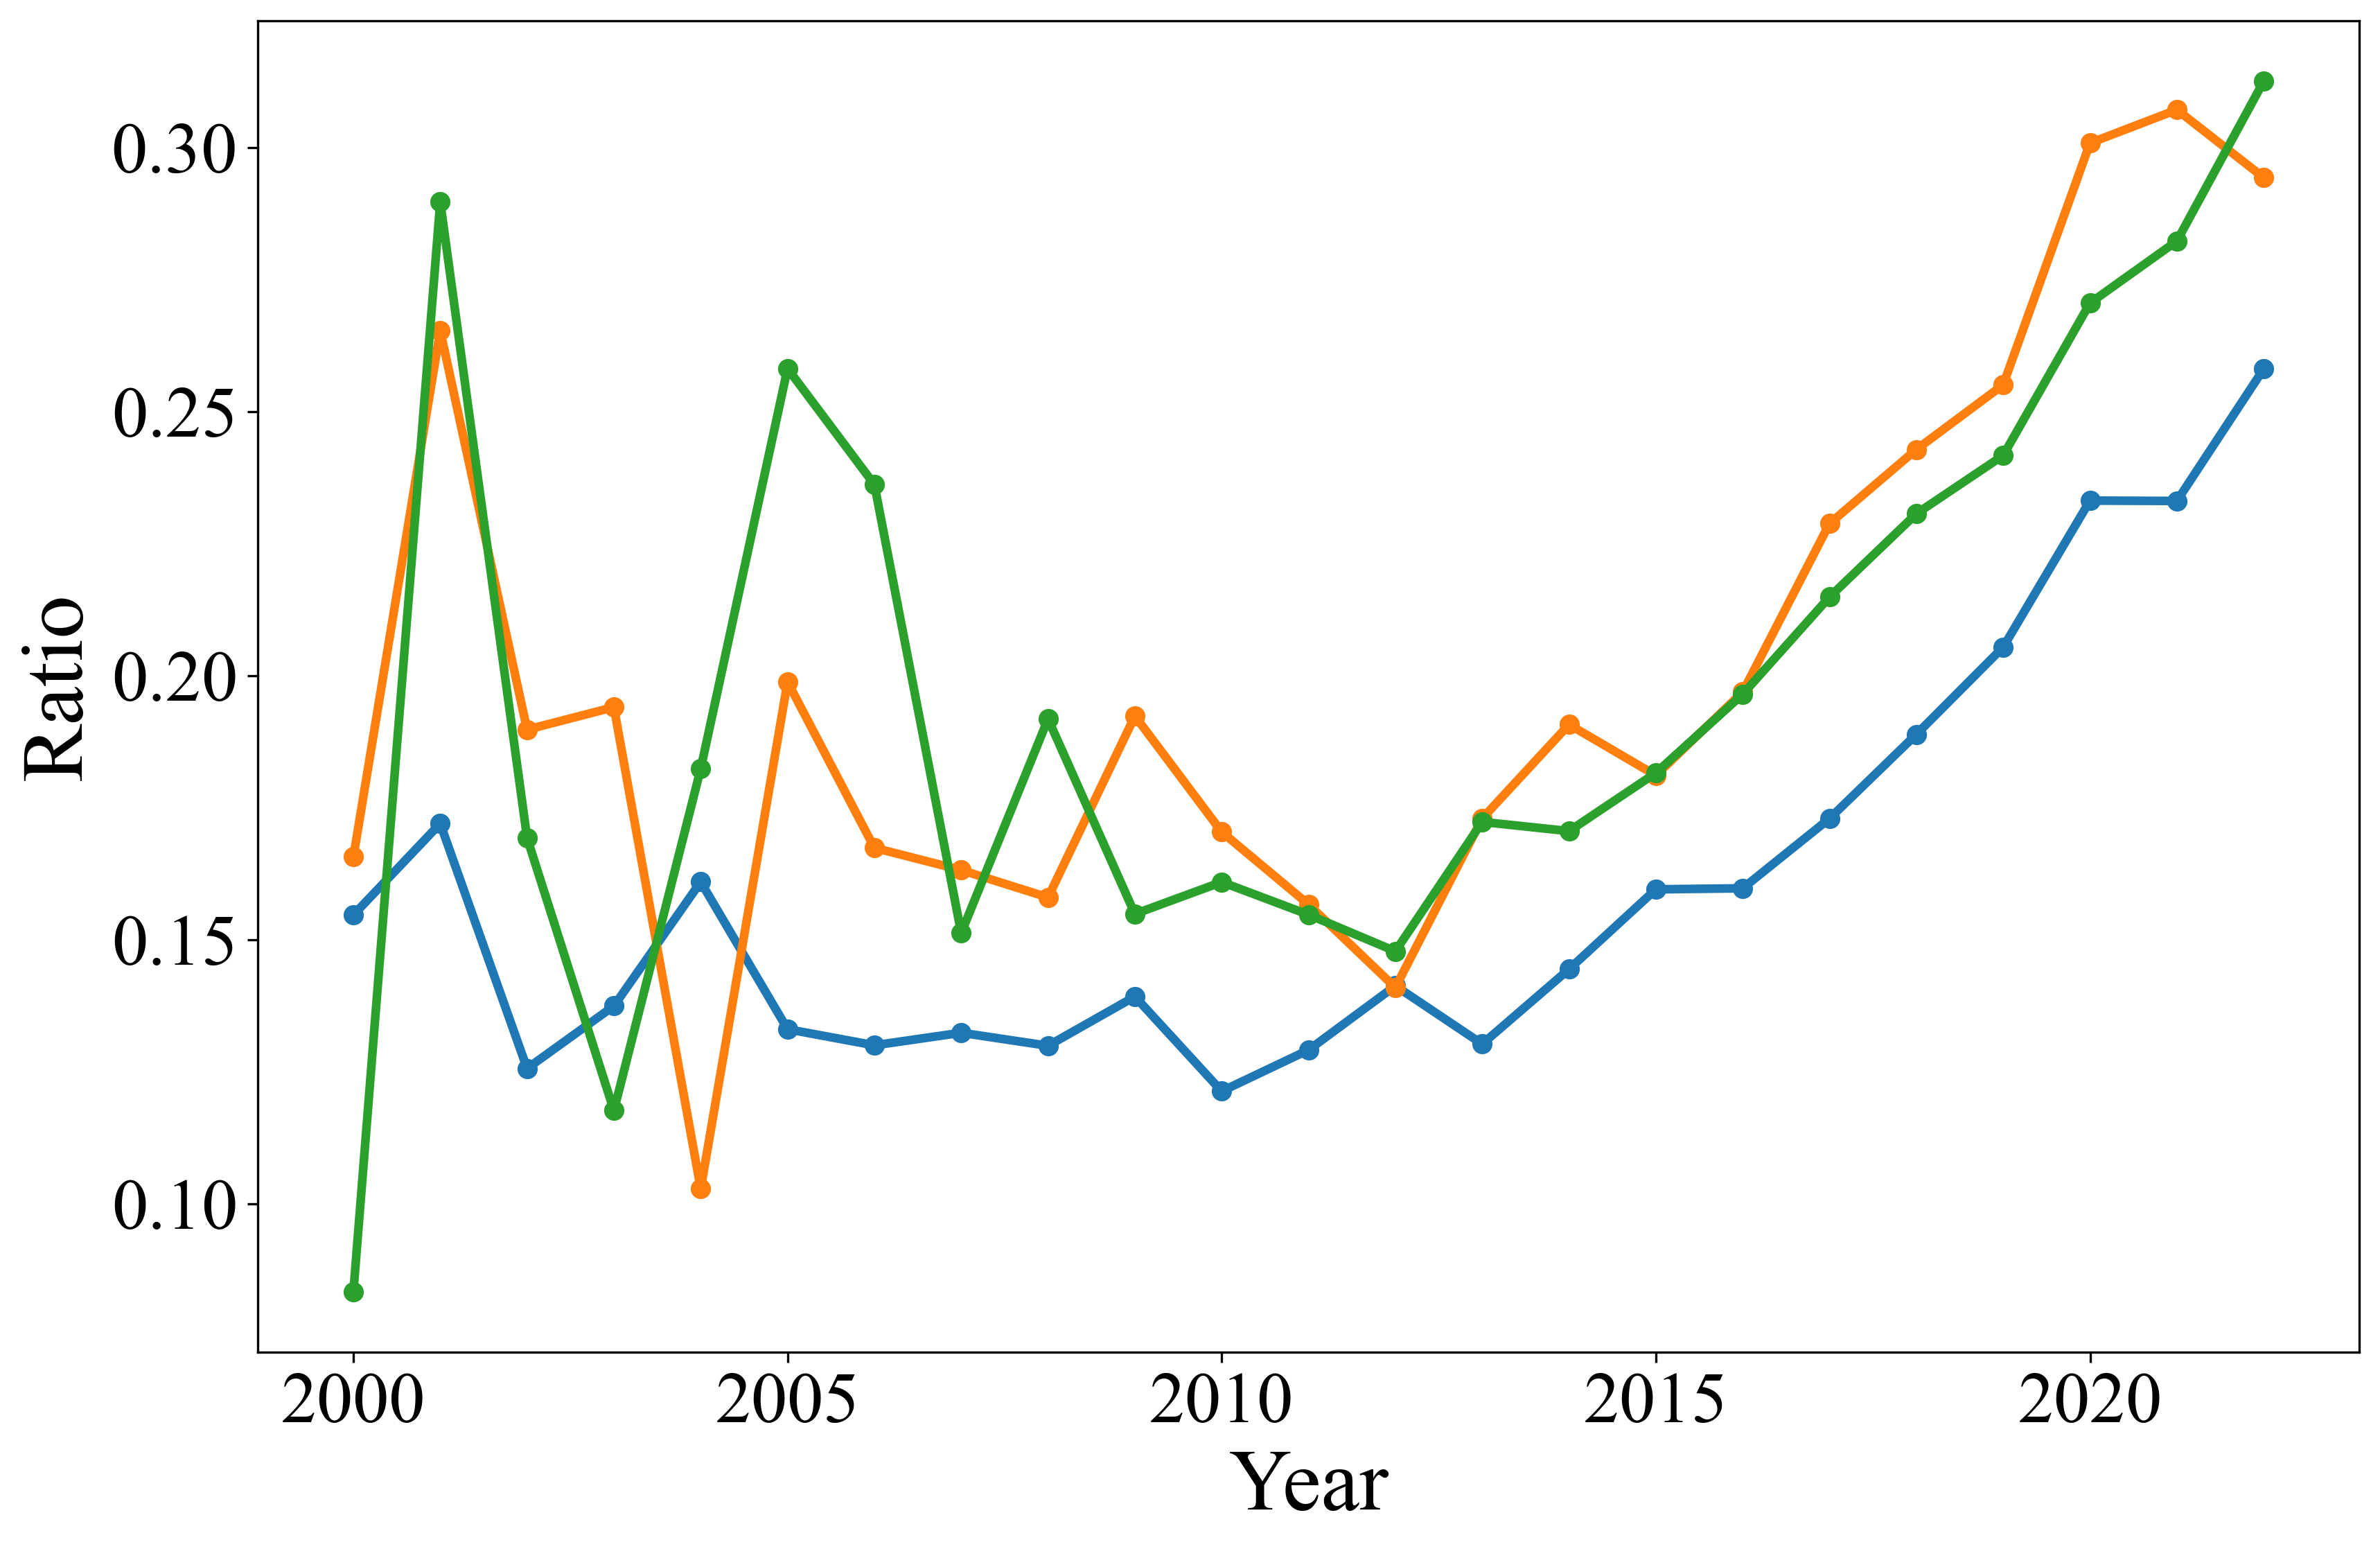

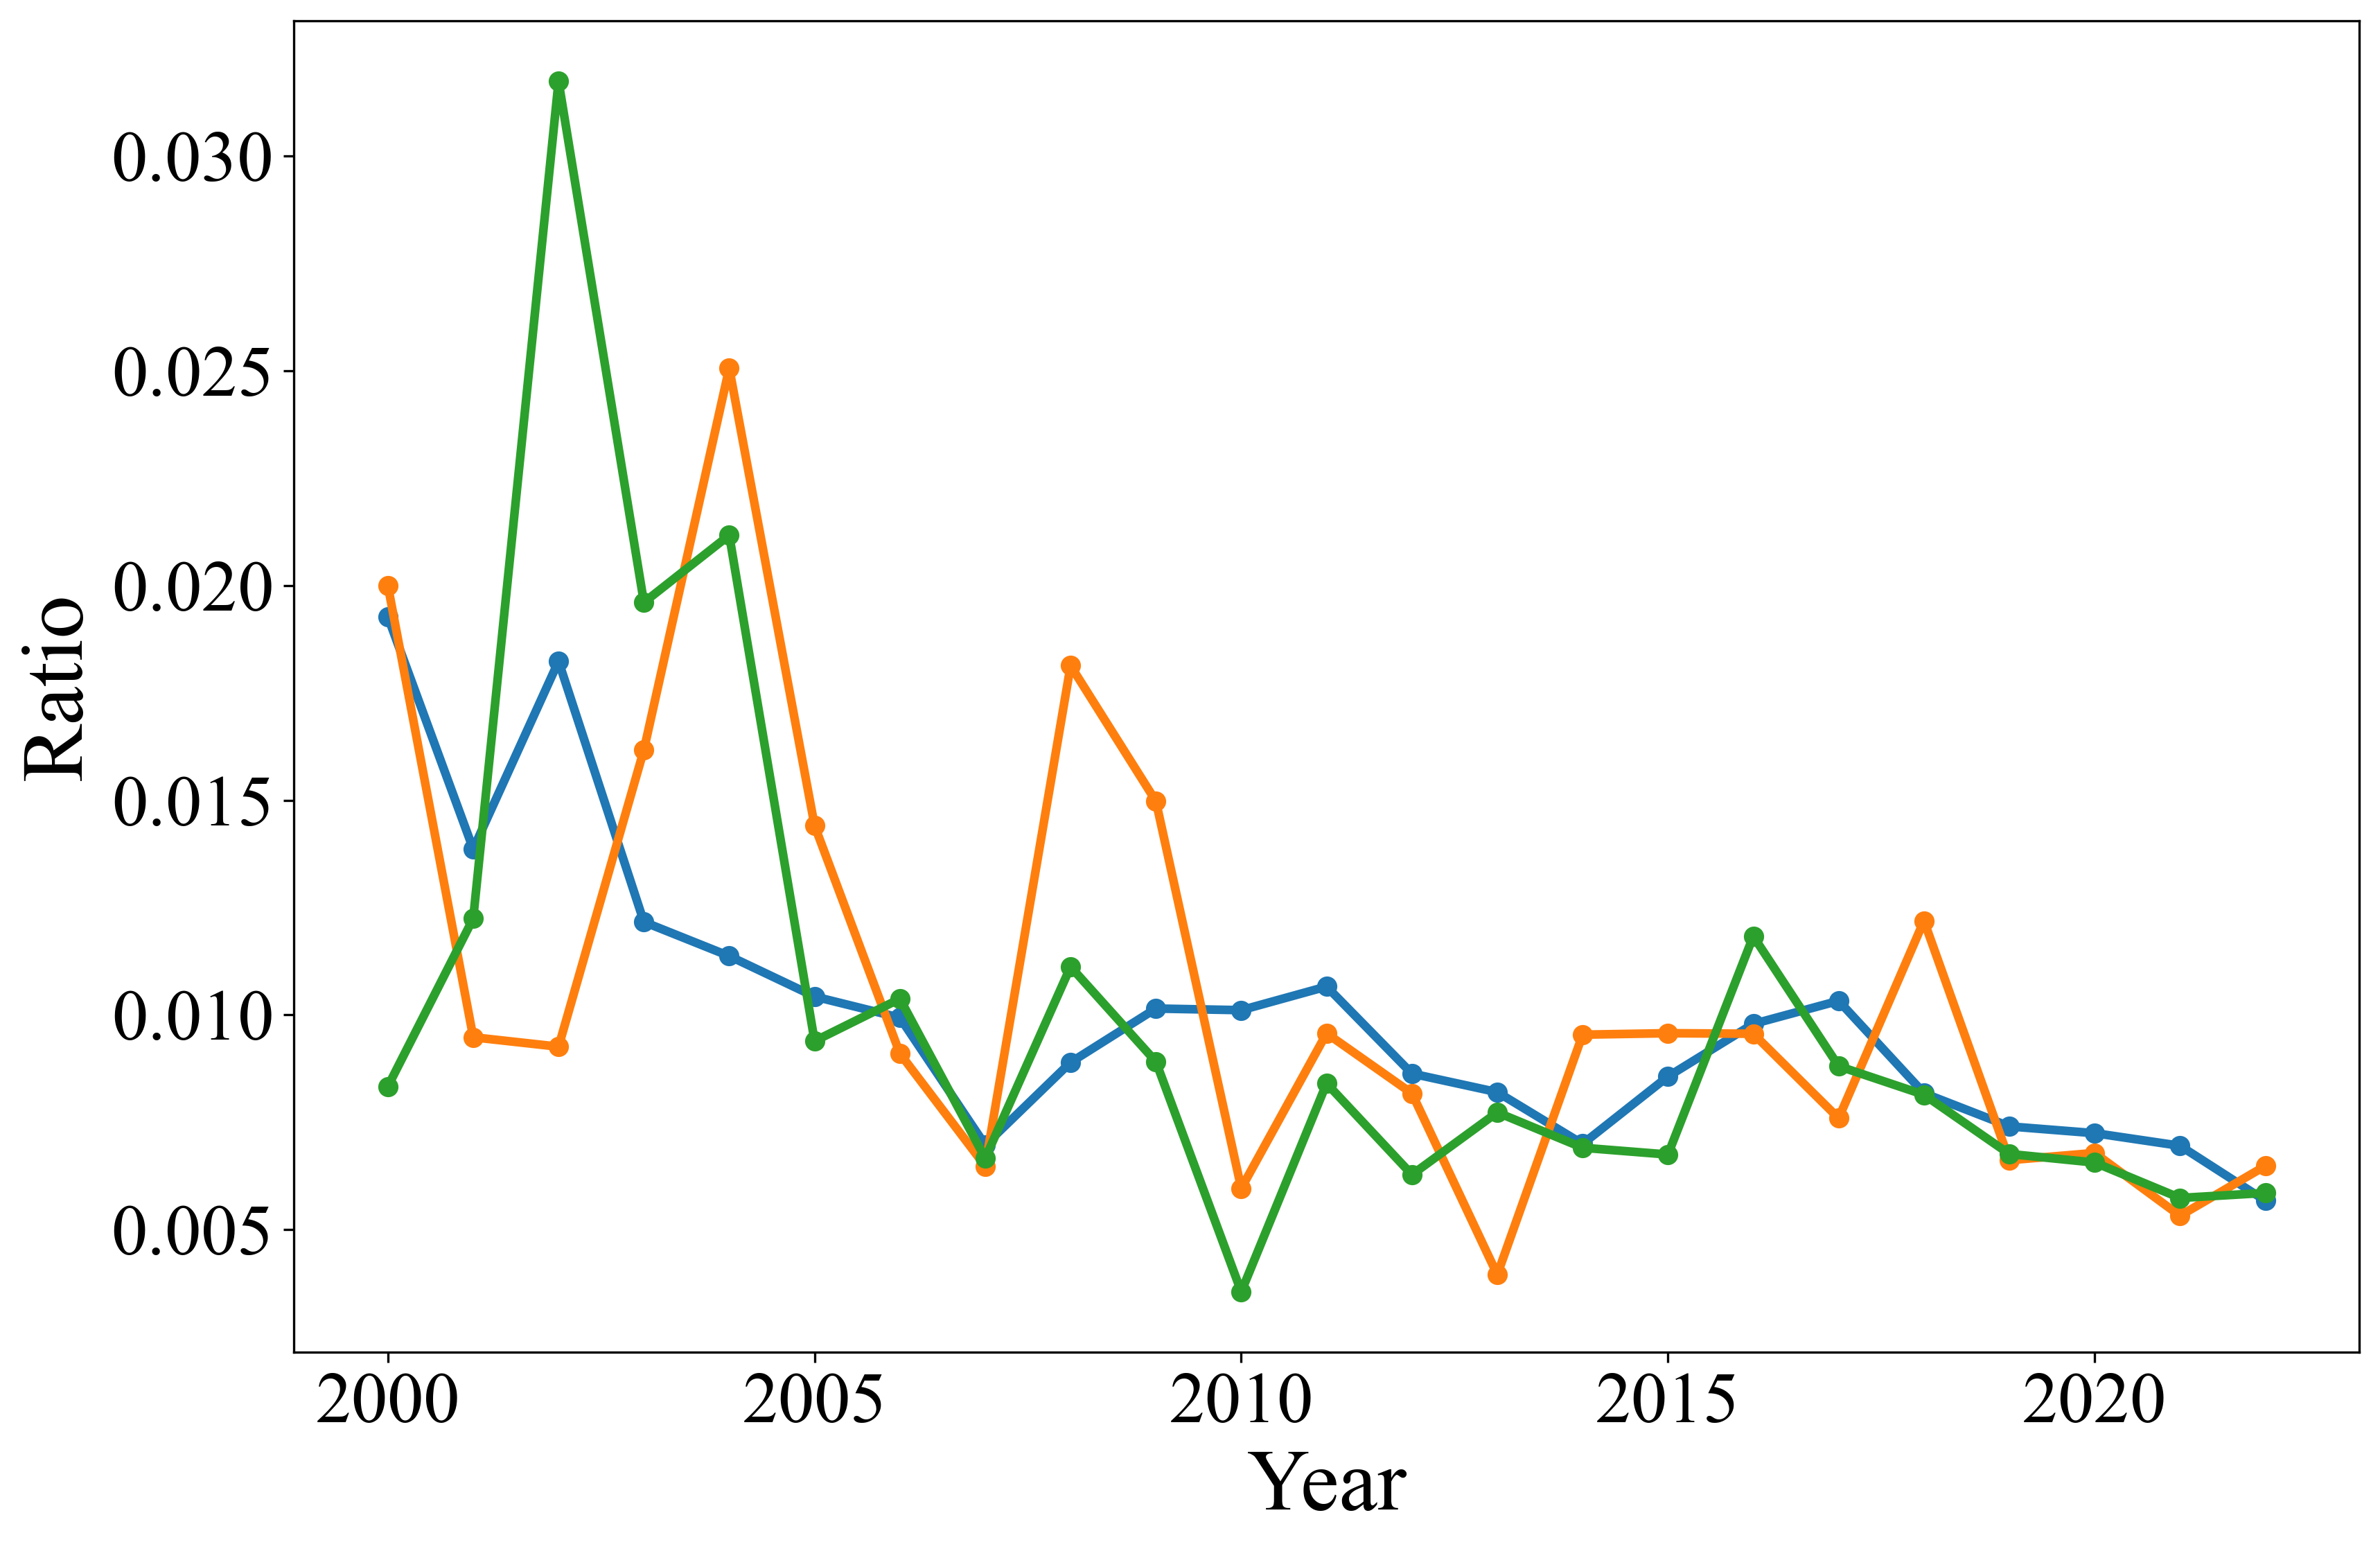

In [26]:
import matplotlib.pyplot as plt
import numpy as np

years = range(2000, 2023)
# 设置全局字体大小
plt.rcParams.update({'font.size': 25})
# 要分析的机构类型
analysis_institutions = ['academic', 'industry', 'cooperation', 'other']

# 循环绘制每个机构类型的数据
for analysis_institution in analysis_institutions:
    # 创建新的图形
    plt.figure(figsize=(12,8), dpi=300)
    
    # 定义空列表存储每年的占比数据
    ratio_lists = []
    
    for institution_type in ['academic', 'industry', 'cooperation']:
        ratio_list = []
        
        for year in years:
            analysis_dict = flow_lists[year][institution_type]
            # 计算所有值的总和
            total_sum = sum(analysis_dict.values())
            ratio = analysis_dict[analysis_institution] / total_sum
            ratio_list.append(ratio)
        
        ratio_lists.append(ratio_list)
    
    # 绘制折线图
    for i, institution_type in enumerate(['academic', 'industry', 'cooperation']):
        plt.plot(years, ratio_lists[i], marker='o', label=institution_type,linewidth=3)
    
    # plt.title(f'Citation belongs to {analysis_institution}', fontsize=18)
    plt.xlabel('Year', fontsize=30)
    plt.ylabel('Ratio', fontsize=30)
    # plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fontsize=20)
    plt.grid(False)
    
    plt.tight_layout()
    plt.show()

#### Step 5 单独分析学术界和工业界的引文

In [28]:
flow_lists

defaultdict(dict,
            {2000: defaultdict(dict,
                         {'academic': {'academic': 1372,
                           'industry': 171,
                           'cooperation': 289,
                           'other': 36},
                          'industry': {'cooperation': 58,
                           'academic': 246,
                           'other': 7,
                           'industry': 39},
                          'cooperation': {'academic': 98,
                           'industry': 11,
                           'cooperation': 10,
                           'other': 1}}),
             2001: defaultdict(dict,
                         {'academic': {'academic': 1144,
                           'industry': 148,
                           'cooperation': 273,
                           'other': 22},
                          'industry': {'academic': 124,
                           'other': 2,
                           'industry': 29,
                  

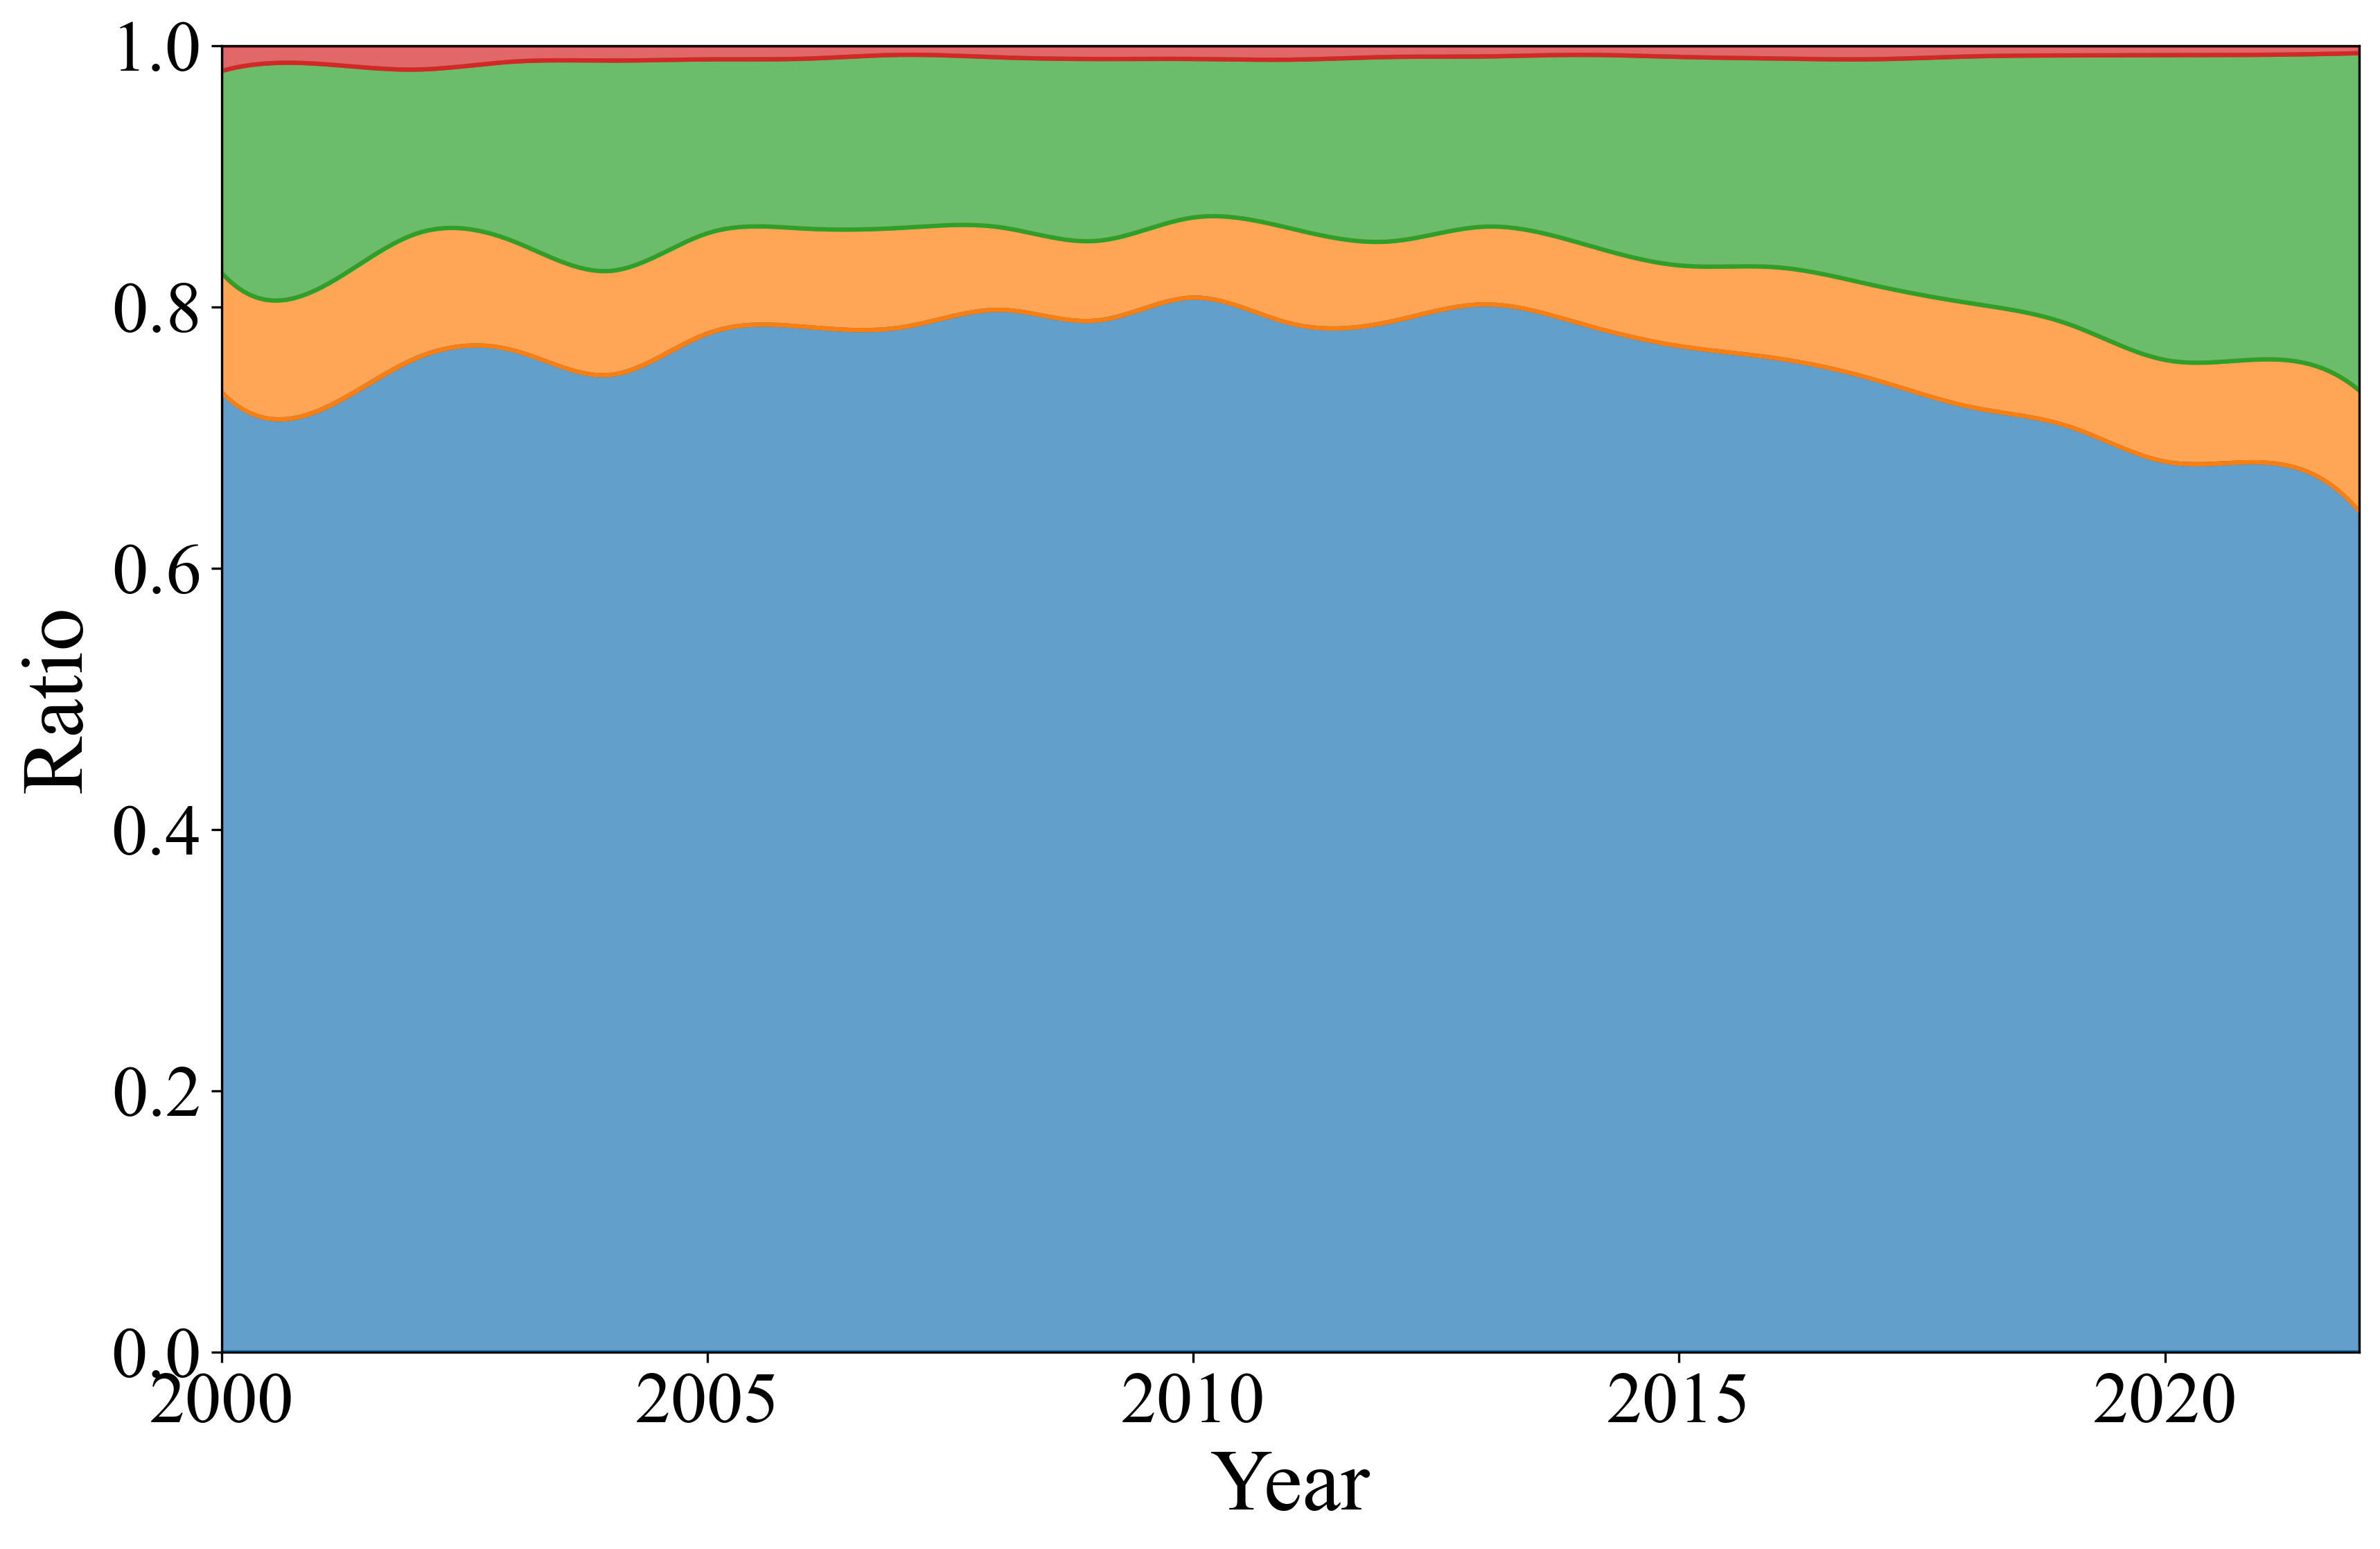

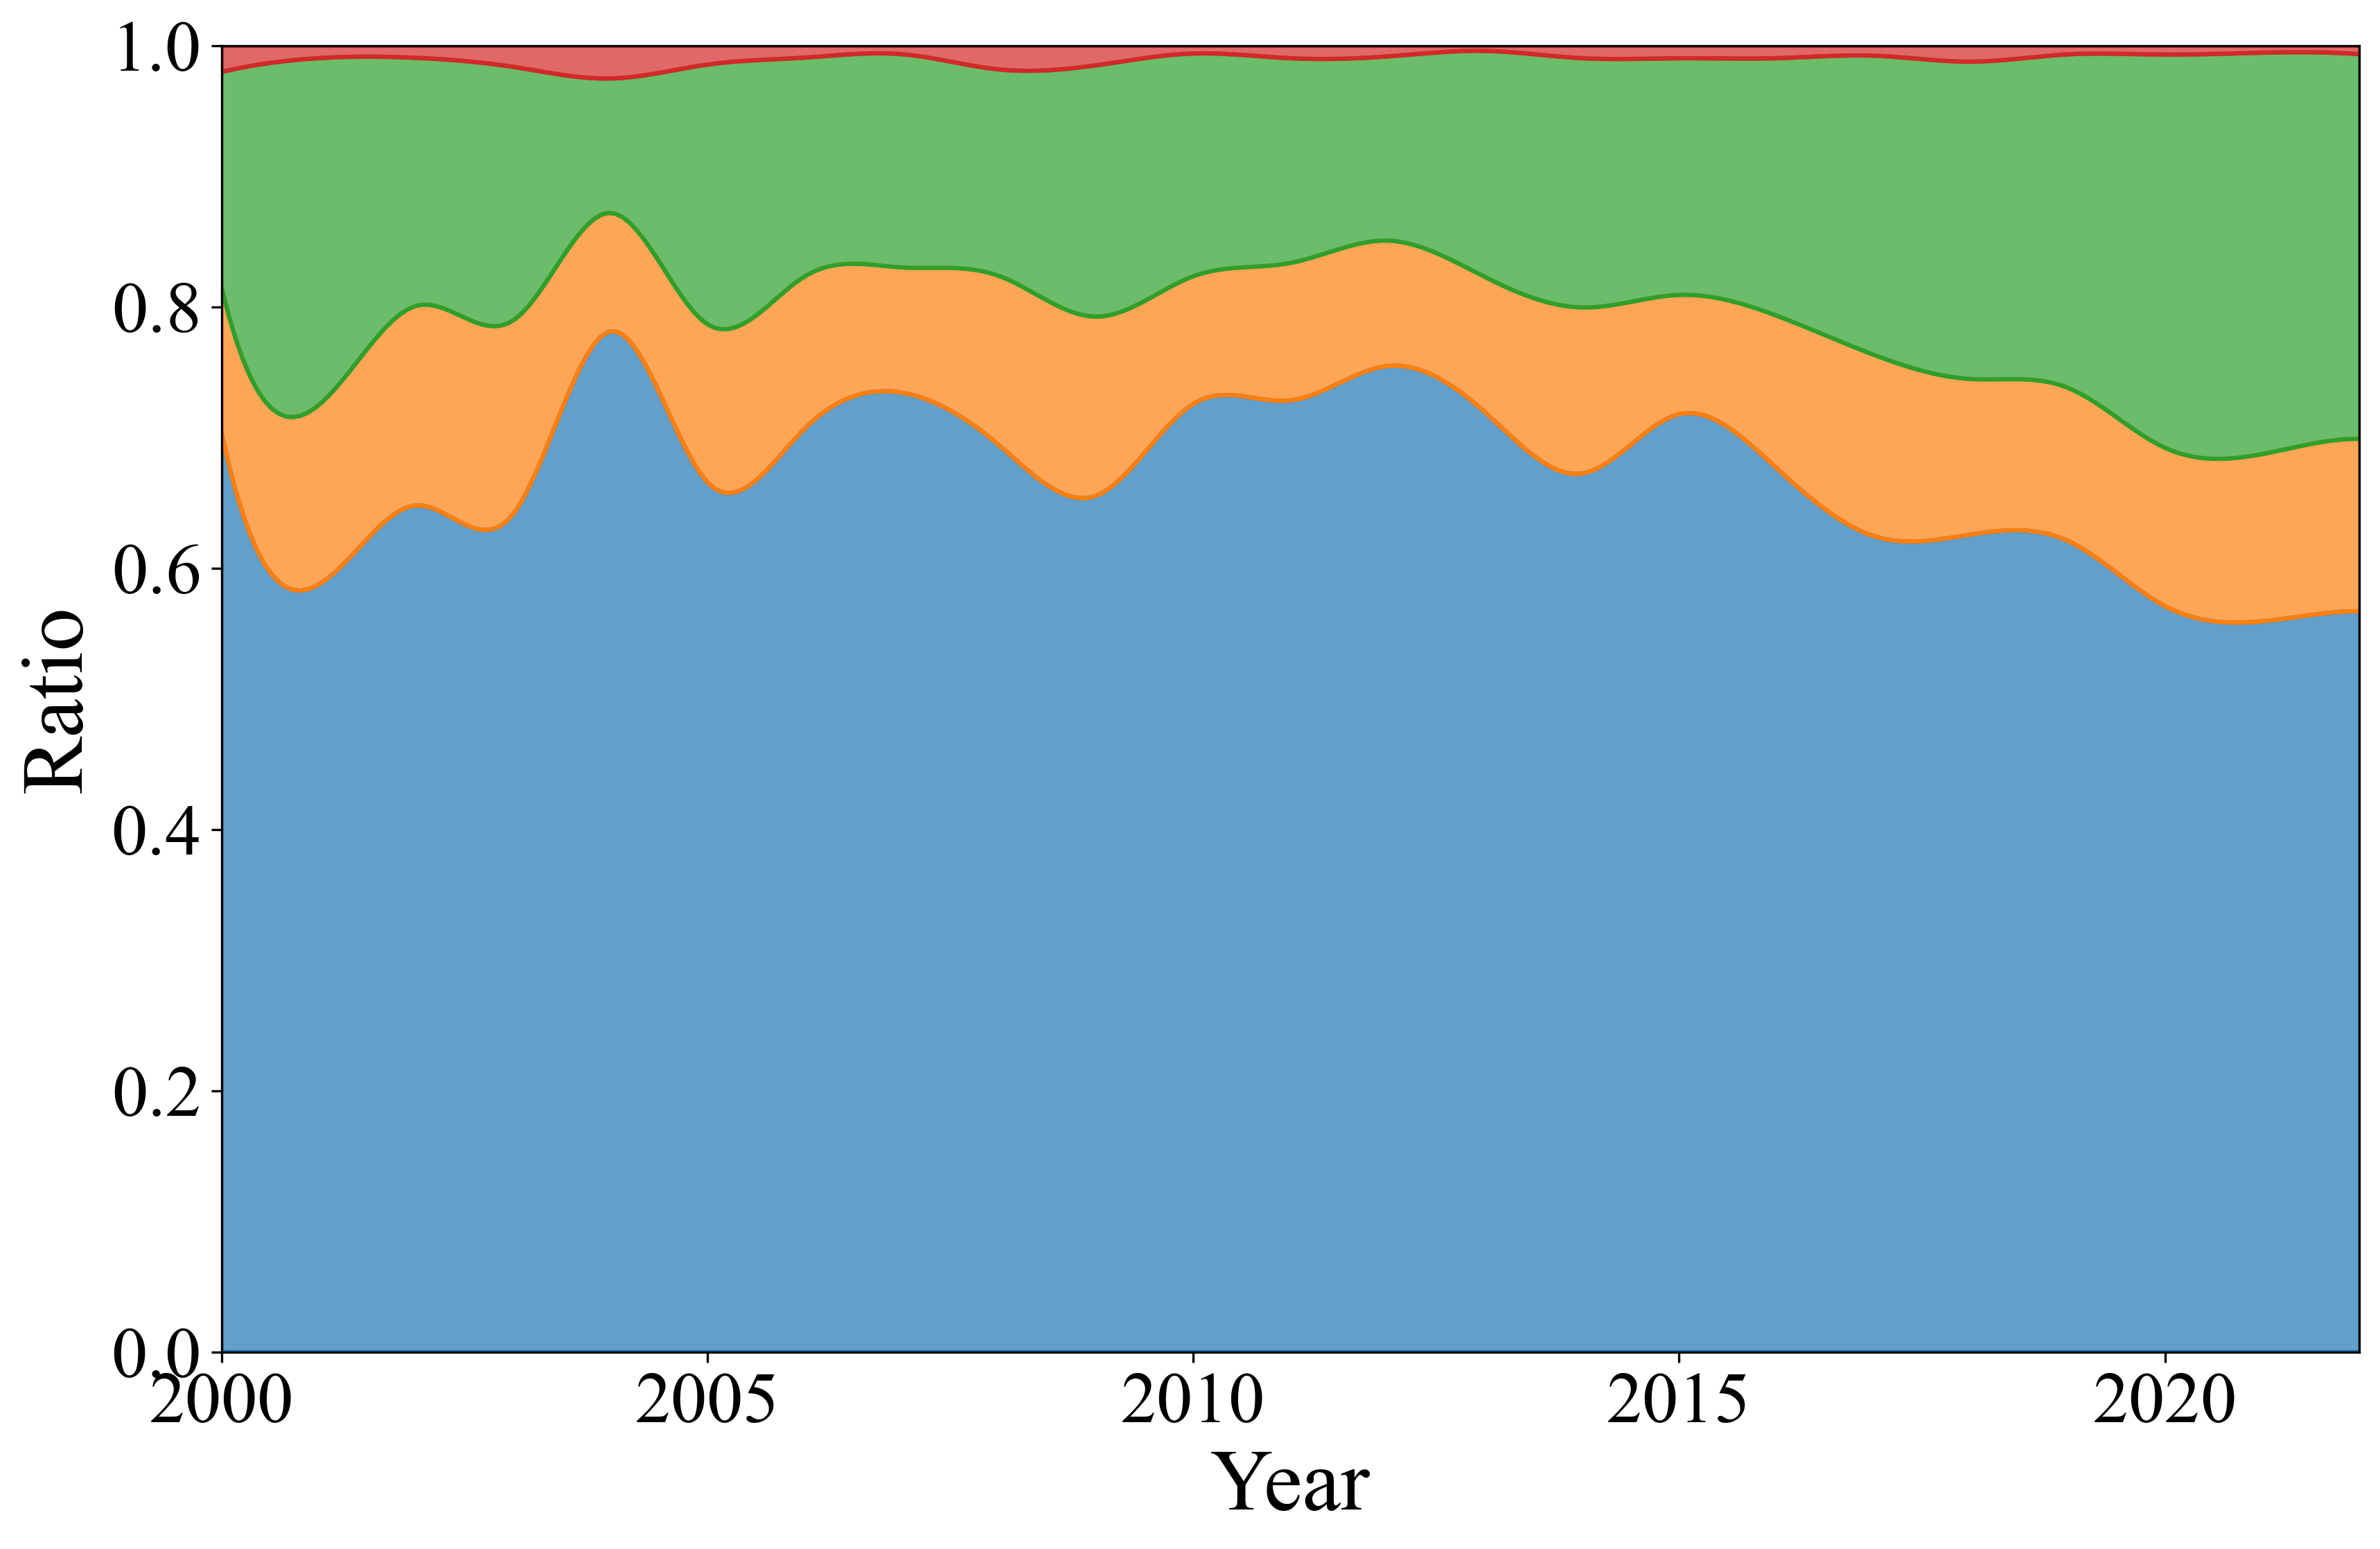

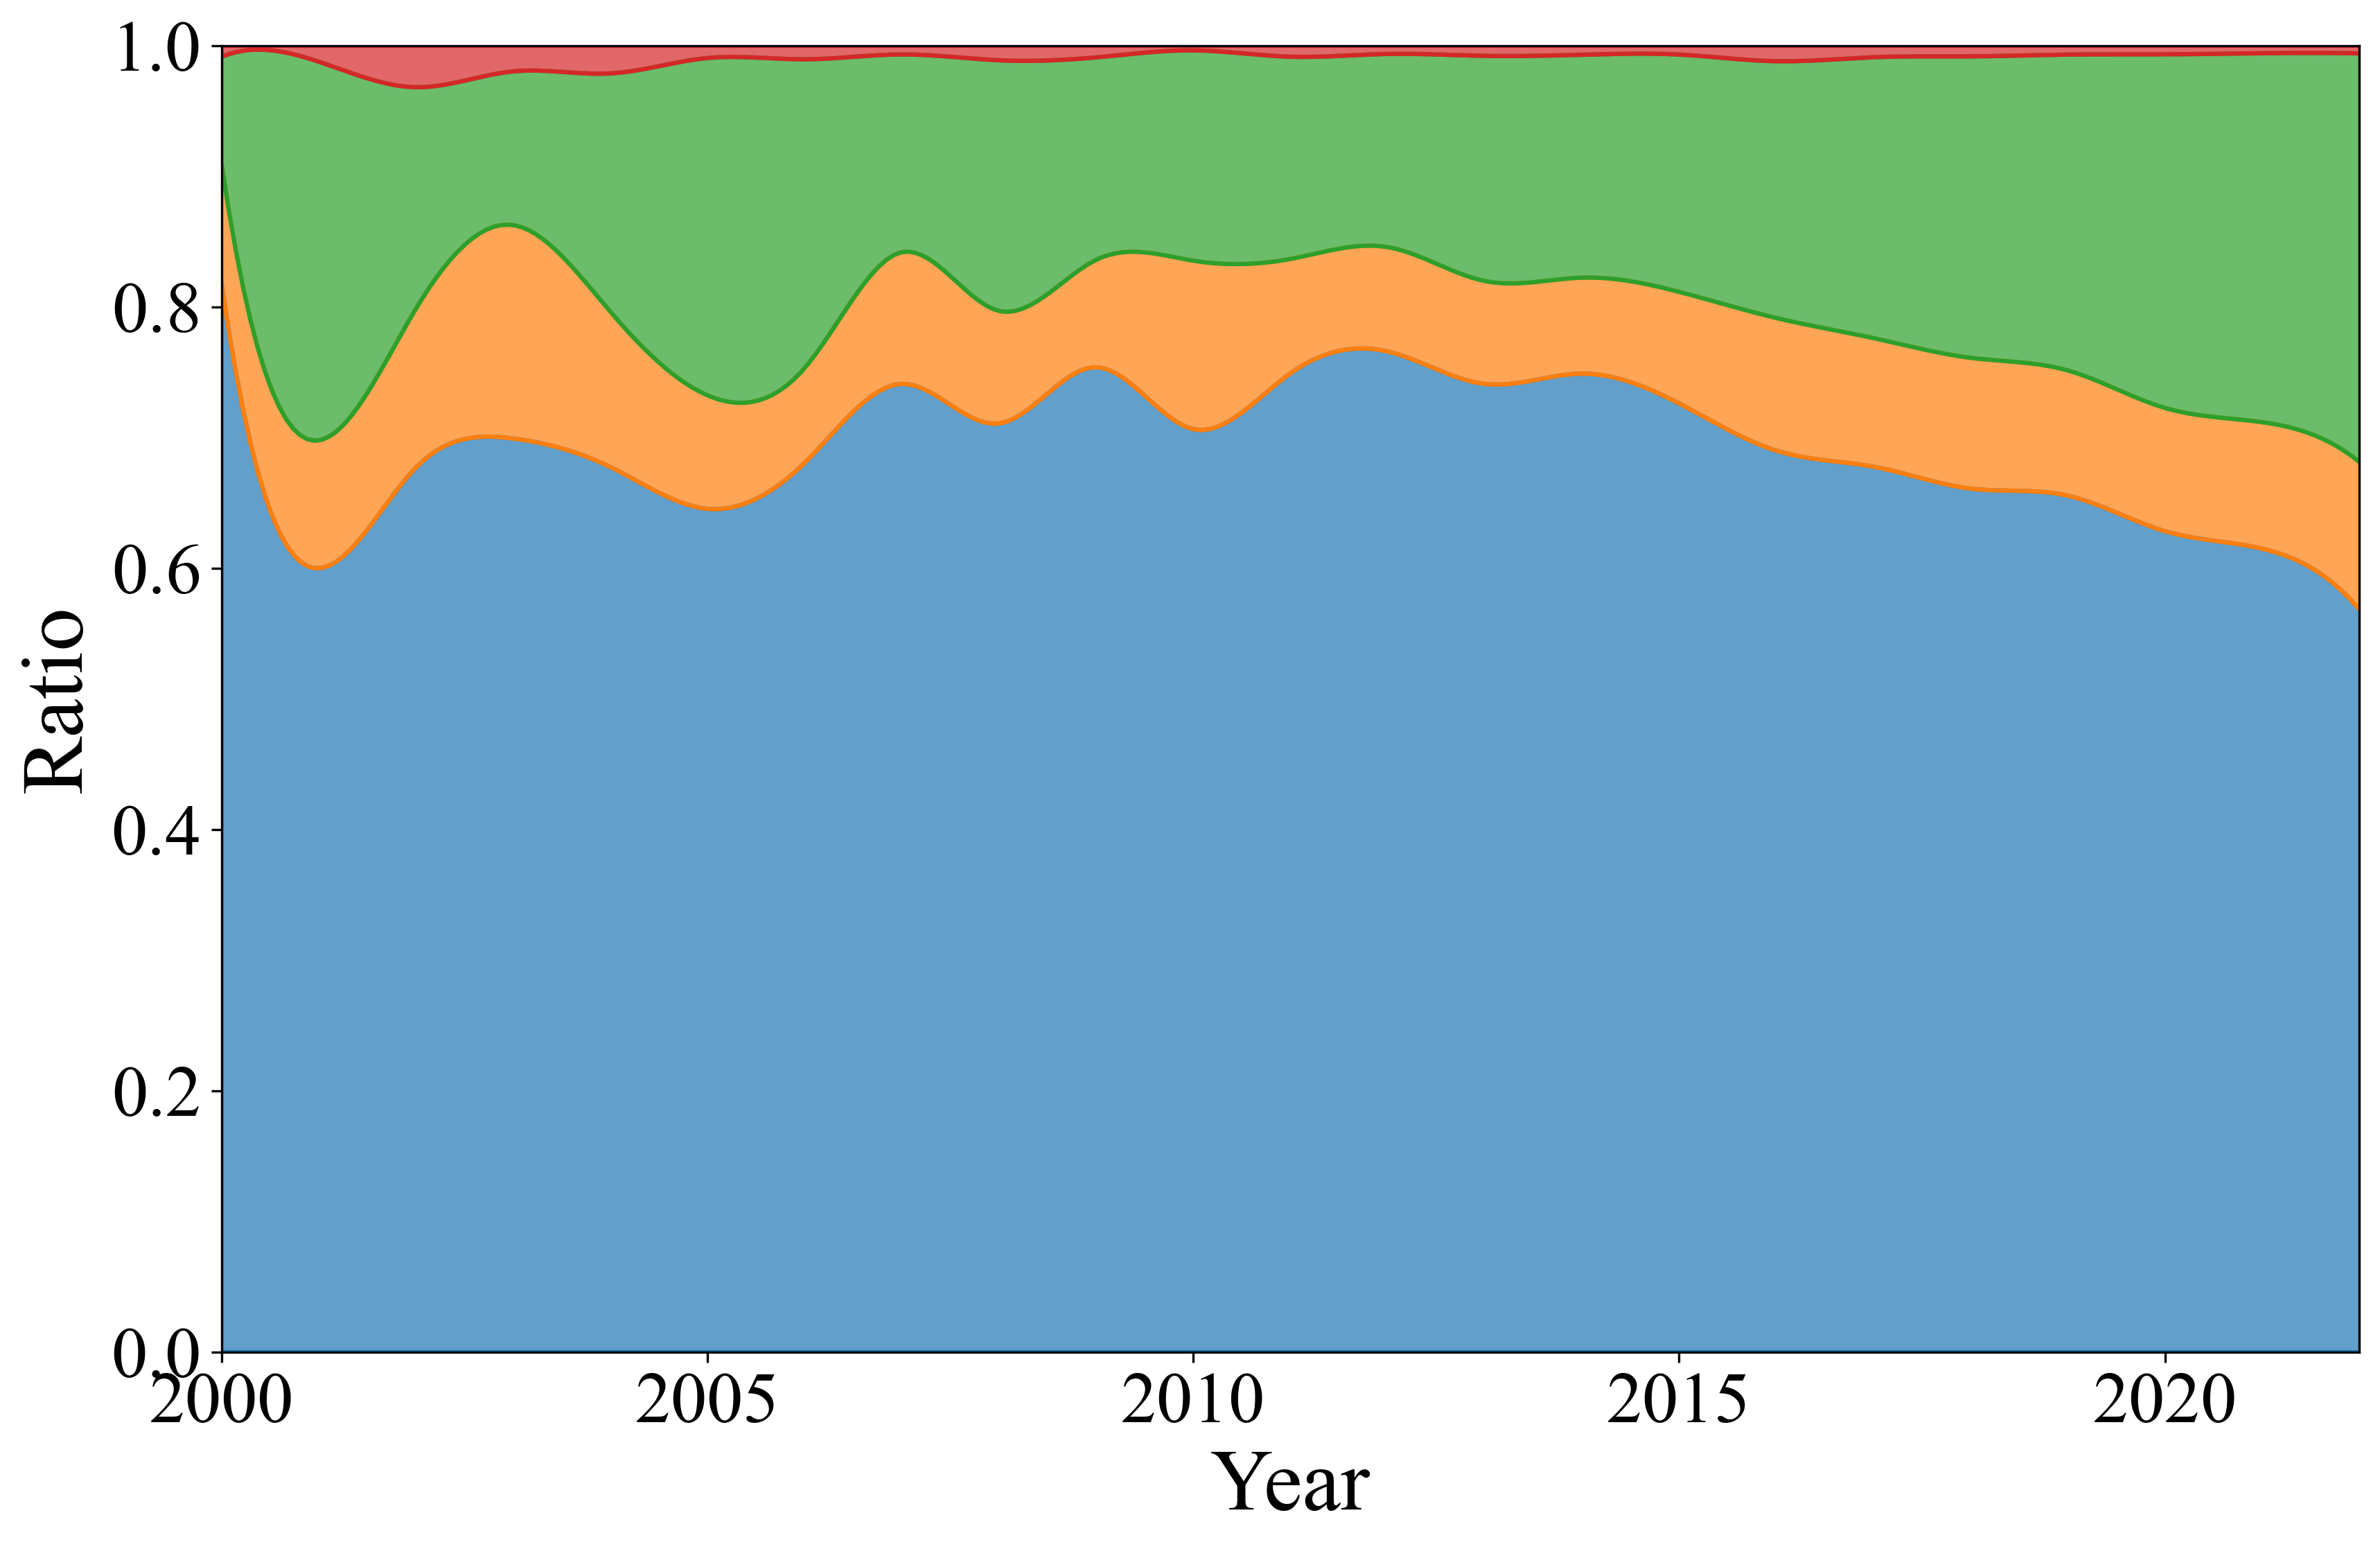

In [31]:
years = range(2000, 2023)
plt.rcParams.update({'font.size': 25})

ratio_lists = defaultdict(dict)
# 设置全局字体大小
plt.rcParams.update({'font.size': 25})
for type in ['academic', 'industry', 'cooperation']:
    ratio_lists[type] = defaultdict(list)

for year in flow_lists:
    for analysis_institution in ['academic', 'industry', 'cooperation']:
        analysis_dict = flow_lists[year][analysis_institution]
        # 计算所有值的总和
        total_sum = sum(analysis_dict.values())
        for institution_type in ['academic', 'industry', 'cooperation', 'other']:
            ratio = analysis_dict[institution_type] / total_sum
            ratio_lists[analysis_institution][institution_type].append(ratio)
# 循环绘制堆叠图
for i, analysis_institution in enumerate(['academic', 'industry', 'cooperation']):
    plt.figure(figsize=(12,8), dpi=300)
    bottom = np.zeros(len(years))  # 底部的初始值为零，用于堆叠效果
    types = ['academic', 'industry', 'cooperation', 'other']
    colors = plt.cm.tab10.colors  # 使用SciPy的tab10颜色循环

    for j, type in enumerate(types):
        # 使用插值使折线变得平滑
        x_new = np.linspace(min(years), max(years), 300)  # 创建更多的点
        f_bottom = interp1d(years, bottom, kind='cubic')
        f_top = interp1d(years, bottom + ratio_lists[analysis_institution][type], kind='cubic')

        # 绘制平滑的边界线
        plt.plot(x_new, f_bottom(x_new), color=colors[j])
        plt.plot(x_new, f_top(x_new), color=colors[j])

        # 绘制堆叠面积图
        plt.fill_between(x_new, f_bottom(x_new), f_top(x_new),
                         label=type, color=colors[j], alpha=0.7)

        # 更新堆叠的底部值
        bottom += ratio_lists[analysis_institution][type]

    # plt.title(f'{analysis_institution.capitalize()} Cites papers')  # 标题首字母大写

    plt.ylim(0.0, 1.0)
    # 设置横坐标范围，并手动设置刻度
    plt.xlim(2000, 2022)
    plt.xticks(range(2000, 2023, 5))  # 每两年显示一个刻度

    plt.xlabel('Year', fontsize=30)
    plt.ylabel('Ratio', fontsize=30)
    # plt.legend(fontsize=12, loc='lower center', bbox_to_anchor=(0.5, 0), ncol=4)  # 设置图例在左下方居中显示
    plt.tight_layout()  # 自动调整子图参数，确保整体布局合理

    plt.show()

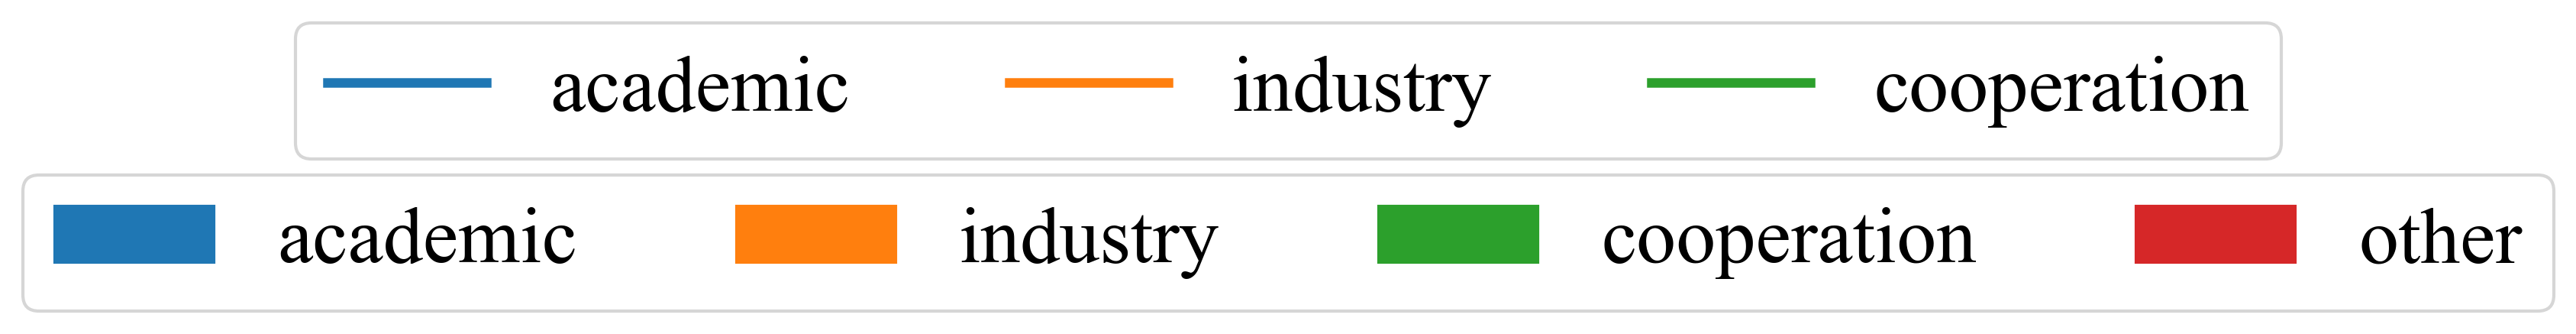

In [54]:
import matplotlib.pyplot as plt

# 获取tab10颜色循环的颜色
colors = plt.cm.tab10.colors

# 创建第一个图例（方块）
legend_labels1 = ['academic', 'industry', 'cooperation', 'other']
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(colors))]

# 创建第二个图例（横线）
legend_labels2 = ['academic', 'industry', 'cooperation']
legend_lines = [plt.Line2D([0], [1], color=colors[i], lw=3) for i in range(len(legend_labels2))]

# 创建图形和子图
fig, axs = plt.subplots(2, 1, figsize=(8, 1.7), dpi=300)

# 设置第一个图例
axs[0].legend(legend_lines, legend_labels2, loc='center', ncol=len(legend_labels2), fontsize=25)
axs[0].axis('off')  # 关闭坐标轴显示
# 设置第二个图例
axs[1].legend(legend_patches, legend_labels1, loc='center', ncol=len(colors), fontsize=25)
axs[1].axis('off')  # 关闭坐标轴显示

plt.tight_layout()
plt.show()


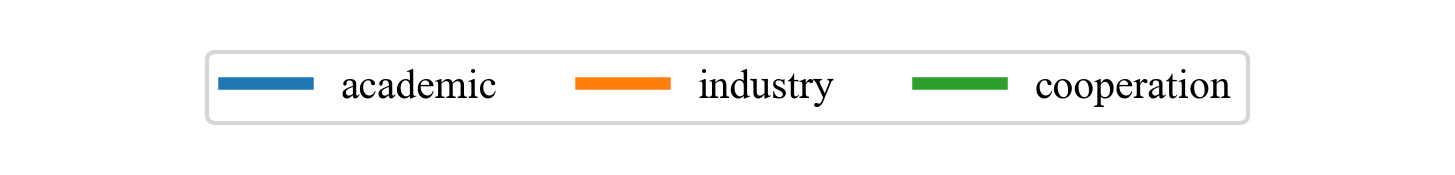

In [46]:
import matplotlib.pyplot as plt

# 获取tab10颜色循环的颜色
colors = plt.cm.tab10.colors

# 创建一个图例显示四种颜色的横线，线宽为3
legend_labels = ['academic', 'industry', 'cooperation']
legend_lines = [plt.Line2D([0], [1], color=colors[i], lw=3) for i in range(len(colors))]

plt.figure(figsize=(6, 0.5), dpi=300)
plt.legend(legend_lines, legend_labels, loc='center', ncol=len(colors),fontsize=10)
plt.axis('off')  # 关闭坐标轴显示，仅显示图例
plt.show()


In [19]:
flow_lists

defaultdict(dict,
            {2000: defaultdict(dict,
                         {'academic': {'academic': 1556,
                           'industry': 274,
                           'other': 38},
                          'industry': {'academic': 272,
                           'other': 7,
                           'industry': 71},
                          'cooperation': {'academic': 105,
                           'industry': 14,
                           'other': 1}}),
             2001: defaultdict(dict,
                         {'academic': {'academic': 1312,
                           'industry': 249,
                           'other': 26},
                          'industry': {'academic': 163,
                           'other': 2,
                           'industry': 46},
                          'cooperation': {'industry': 45,
                           'academic': 197,
                           'other': 3}}),
             2002: defaultdict(dict,
                     

In [20]:
flow_lists

defaultdict(dict,
            {2000: defaultdict(dict,
                         {'academic': {'academic': 1556,
                           'industry': 274,
                           'other': 38},
                          'industry': {'academic': 272,
                           'other': 7,
                           'industry': 71},
                          'cooperation': {'academic': 105,
                           'industry': 14,
                           'other': 1}}),
             2001: defaultdict(dict,
                         {'academic': {'academic': 1312,
                           'industry': 249,
                           'other': 26},
                          'industry': {'academic': 163,
                           'other': 2,
                           'industry': 46},
                          'cooperation': {'industry': 45,
                           'academic': 197,
                           'other': 3}}),
             2002: defaultdict(dict,
                     

In [21]:
flow_lists[2018]

defaultdict(dict,
            {'academic': {'academic': 24024, 'industry': 3964, 'other': 266},
             'industry': {'industry': 677, 'academic': 2475, 'other': 47},
             'cooperation': {'academic': 9015,
              'industry': 1940,
              'other': 102}})

d:\Anaconda\envs\my_torch\Lib\site-packages\mpl_chord_diagram\utilities.py:167: RuntimeWarning: invalid value encountered in divide
  return (mat[i, :] / x[i]) * (end - start)


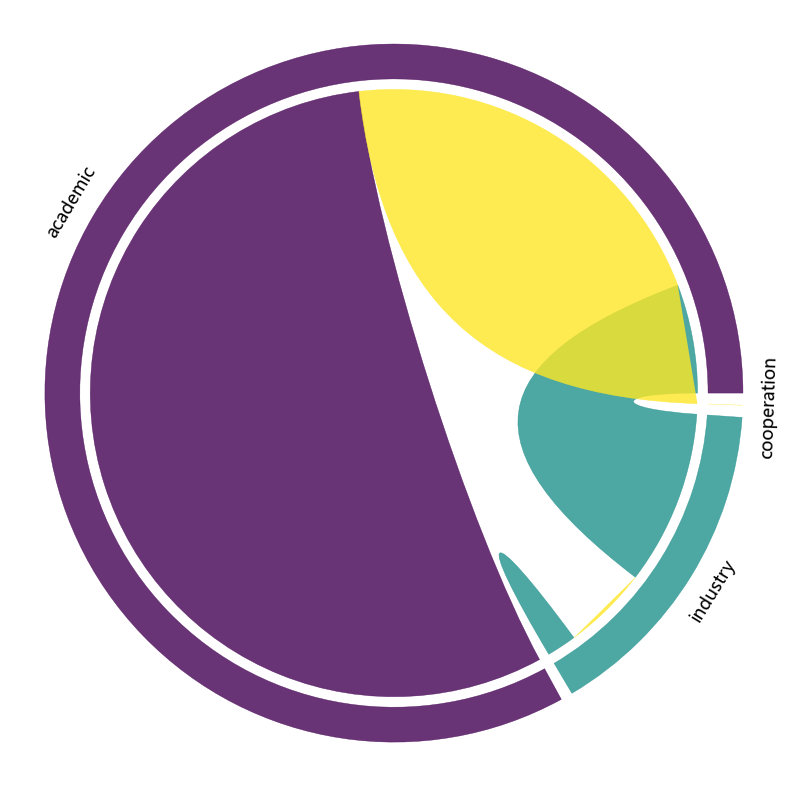

In [22]:
import matplotlib.pyplot as plt
from mpl_chord_diagram import chord_diagram
import numpy as np
plt.rcParams['image.composite_image'] = False
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 指定要使用的字体

flux_data = np.zeros((3,3))
for index_i,institution_type in enumerate(['academic','industry','cooperation']):
    for index_j,j in enumerate(['academic','industry']):
        flux_data[index_j][index_i] = flow_lists[2018][institution_type][j]

names = ["academic","industry","cooperation"]

fig,ax = plt.subplots(figsize=(8,8),dpi=100,facecolor="w")
chord_diagram = chord_diagram(mat=flux_data,names=names,alpha=.8,ax=ax)
plt.tight_layout()

plt.show()

In [23]:
flux_data

array([[24024.,  2475.,  9015.],
       [ 3964.,   677.,  1940.],
       [    0.,     0.,     0.]])

In [38]:
flux_data = np.zeros((3,3))

In [39]:
flux_data

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])